<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

## Problem Statement

The Steppingstone Foundation recently established their program in the state of California in the 10 largest public school districts. Over the past few years they've noticed a problem with some students ability to gain acceptance into private schools. They want to know within each district, which public high schools would be potential candidates to explore as recommendations for students and their families, if they wanted to send students to the top 50 ranked US colleges or universities.

### Contents:
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

--- 
# Part 2 Continued

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

In [78]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 217)
%matplotlib inline

In [79]:
# Data used for analysis
sat_ca = pd.read_csv('../data/sat_2019_ca_clean.csv')
sat_by_college = pd.read_csv('../data/sat_by_college_clean.csv')

In [80]:
# Custom Mean function from previous notebook
'''
    Calculate the mean of values in a list
'''

def calc_mean(values):
    return sum(values) / len(values)

test_values = [1, 2, 3, 4, 5]

calc_mean(test_values)

3.0

In [81]:
# Custom Standard Deviation function from previous notebook
'''
    Calculate the standard deviation of values in a list
'''
def calc_std_deviation(values):
    summed_values = 0
    m = calc_mean(values)
    n = len(values)
    for value in values:
        summed_values += (value - m)**2
    return (summed_values / n)**0.5

test_values = [1, 2, 3, 4, 5]
calc_std_deviation(test_values)

1.4142135623730951

## Exploratory Data Analysis

In [82]:
#Code:

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

In [83]:
# Display first 5 rows and all columns for California SAT data
sat_ca.head()

,school_name,district_name,enrollment11,num_testtakers11,num_erwbenchmark11,pct_erwbenchmark11,num_mathbenchmark11,pct_mathbenchmark11,total_num_bothbenchmark11,pct_bothbenchmark11
0,Belmont Senior High,Los Angeles Unified,219.0,174.0,42.0,24.14,12.0,6.90,11.0,6.32
1,Canoga Park Senior High,Los Angeles Unified,333.0,275.0,97.0,35.27,37.0,13.45,35.0,12.73
2,Foshay Learning Center,Los Angeles Unified,187.0,183.0,91.0,49.73,47.0,25.68,44.0,24.04
3,New Open World Academy K-12,Los Angeles Unified,79.0,79.0,22.0,27.85,10.0,12.66,6.0,7.59
4,Corona High,Corona-Norco Unified,572.0,168.0,128.0,76.19,84.0,50.00,78.0,46.43


In [84]:
# display first 5 rows of SAT College Data
sat_by_college.head()

,school,low_score,high_score
0,Stanford University,1440.0,1570.0
1,Harvard College,1460.0,1580.0
2,Princeton University,1440.0,1570.0
3,Columbia University,1450.0,1560.0
4,Yale University,1460.0,1570.0


In [85]:
# Summary Stats
sat_ca.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollment11,318.0,258.025157,222.544957,4.0,97.250,158.000,384.0000,1218.00
num_testtakers11,318.0,173.710692,157.236118,15.0,65.000,113.500,243.5000,824.00
num_erwbenchmark11,318.0,97.289308,103.372155,0.0,25.000,60.500,133.7500,560.00
pct_erwbenchmark11,318.0,51.828491,26.057485,0.0,32.305,49.465,72.5525,99.12
num_mathbenchmark11,318.0,63.053459,81.069781,0.0,12.000,30.000,81.0000,546.00
pct_mathbenchmark11,318.0,32.775943,26.689614,0.0,12.230,24.370,50.0000,96.79
total_num_bothbenchmark11,318.0,59.449686,79.056117,0.0,10.000,27.000,75.0000,543.00
pct_bothbenchmark11,318.0,30.609811,26.294940,0.0,9.925,22.060,46.9025,96.11


Summary statistics of all columns in California SAT Data.

Out of all high schools in California's 10 largest districts on average 52% of students meet or exceed the Evidence-Based Reading & Writing benchmark for the SAT. 33% of students meet or exceed the Math benchmark for the SAT. 31% meet or exceed the benchmark for both sections.

In [86]:
# Summary Stats
sat_by_college.describe().T

,count,mean,std,min,25%,50%,75%,max
low_score,51.0,1358.627451,90.200213,1150.0,1295.0,1350.0,1440.0,1530.0
high_score,51.0,1515.882353,49.037801,1410.0,1490.0,1520.0,1560.0,1580.0


Summary statistics of all columns in SAT College Data.

Out of the top ranked 50 colleges / universities on average students need a score between 1359 and 1516.

In [87]:
# Calculate standard deviation of all numeric columns in California SAT Data and store in dictionary using custom standard deviation function
std_ca_columns = {column: calc_std_deviation(values) for column, values in sat_ca.iteritems() if values.dtype == 'float64'}
std_ca_columns

{'enrollment11': 222.1947683686186,
 'num_testtakers11': 156.98869670130463,
 'num_erwbenchmark11': 103.2094923911903,
 'pct_erwbenchmark11': 26.016482334618594,
 'num_mathbenchmark11': 80.94221269653175,
 'pct_mathbenchmark11': 26.64761594272101,
 'total_num_bothbenchmark11': 78.93171746461427,
 'pct_bothbenchmark11': 26.25356282432328}

In [88]:
# Calculate standard deviation of all numeric columns in College SAT Data and store in dictionary using custom standard deviation function
std_college_columns = {column: calc_std_deviation(values) for column, values in sat_by_college.iteritems() if values.dtype == 'float64'}
std_college_columns

{'low_score': 89.31151931155239, 'high_score': 48.55465772323527}

In [89]:
# Get the ratio of number of students enrolled to number of test takers for 11th grade
sat_ca['testtaker_ratio11'] = ((sat_ca['num_testtakers11'] / sat_ca['enrollment11']) * 100).round()
sat_ca['testtaker_ratio11']

0       79.0
1       83.0
2       98.0
3      100.0
4       29.0
       ...  
313     74.0
314     94.0
315     59.0
316    425.0
317     39.0
Name: testtaker_ratio11, Length: 318, dtype: float64

In [90]:
sat_ca['district_name'].unique()

array(['Los Angeles Unified', 'Corona-Norco Unified', 'San Diego Unified',
       'San Francisco Unified', 'San Bernardino City Unified',
       'San Juan Unified', 'Elk Grove Unified', 'Fresno Unified',
       'Long Beach Unified', 'Capistrano Unified'], dtype=object)

In [91]:
# Gather districts and their schools with 60 percent or more of their enrolled grade 11 students who participate in the SAT
districts_above_60_grade11 = sat_ca.loc[sat_ca['testtaker_ratio11'] >= 60.0]
districts_above_60_grade11.head()

,school_name,district_name,enrollment11,num_testtakers11,num_erwbenchmark11,pct_erwbenchmark11,num_mathbenchmark11,pct_mathbenchmark11,total_num_bothbenchmark11,pct_bothbenchmark11,testtaker_ratio11
0,Belmont Senior High,Los Angeles Unified,219.0,174.0,42.0,24.14,12.0,6.90,11.0,6.32,79.0
1,Canoga Park Senior High,Los Angeles Unified,333.0,275.0,97.0,35.27,37.0,13.45,35.0,12.73,83.0
2,Foshay Learning Center,Los Angeles Unified,187.0,183.0,91.0,49.73,47.0,25.68,44.0,24.04,98.0
3,New Open World Academy K-12,Los Angeles Unified,79.0,79.0,22.0,27.85,10.0,12.66,6.0,7.59,100.0
6,The O'Farrell Charter,San Diego Unified,127.0,114.0,77.0,67.54,47.0,41.23,47.0,41.23,90.0


In [92]:
# Count how many schools in each district meet the above criteria for grade 11
districts_above_60_grade11.groupby('district_name')['school_name'].count()

district_name
Elk Grove Unified                1
Fresno Unified                   9
Long Beach Unified              12
Los Angeles Unified            177
San Bernardino City Unified      8
San Diego Unified                8
San Francisco Unified            2
Name: school_name, dtype: int64

It appears that only 7 out of the 10 largest school districts have 60 percent or more students in grade 11 who take the SAT. San Juan Unified, Corona-Norco Unified, and Capistrano Unified, do not have any schools who meet this criteria. Will need to investigate those districts separately for recommendations.

In each district below the 60 percent participation rate for each school it appears only 2 schools in the Capistrano Unified district, 6 schools in the Corona-Norco Unified district, and 8 schools in the Elk Grove Unified district have more than 35 percent participation for the SAT.

In [93]:
# Districts with schools who have less than 60 percent participation for grade 11
districts_below_60_grade11 = sat_ca.loc[(sat_ca['district_name'].isin(['San Juan Unified', 'Corona-Norco Unified', 'Capistrano Unified'])) & (sat_ca['testtaker_ratio11'] < 60)]
districts_below_60_grade11.head()

,school_name,district_name,enrollment11,num_testtakers11,num_erwbenchmark11,pct_erwbenchmark11,num_mathbenchmark11,pct_mathbenchmark11,total_num_bothbenchmark11,pct_bothbenchmark11,testtaker_ratio11
4,Corona High,Corona-Norco Unified,572.0,168.0,128.0,76.19,84.0,50.00,78.0,46.43,29.0
16,El Camino Fundamental High,San Juan Unified,352.0,120.0,106.0,88.33,75.0,62.50,72.0,60.00,34.0
61,Tesoro High,Capistrano Unified,639.0,266.0,259.0,97.37,245.0,92.11,243.0,91.35,42.0
81,Mesa Verde High,San Juan Unified,212.0,95.0,67.0,70.53,38.0,40.00,32.0,33.68,45.0
82,Mira Loma High,San Juan Unified,467.0,150.0,144.0,96.00,139.0,92.67,137.0,91.33,32.0


In [94]:
# Number of schools in district
districts_below_60_grade11.groupby('district_name')['testtaker_ratio11'].count()

district_name
Capistrano Unified       7
Corona-Norco Unified     6
San Juan Unified        11
Name: testtaker_ratio11, dtype: int64

In [95]:
# Number of schools who have more than 35 percent of students in grade 11
districts_below_60_grade11[districts_below_60_grade11['testtaker_ratio11'] >= 40].groupby('district_name')['testtaker_ratio11'].count()

district_name
Capistrano Unified      3
Corona-Norco Unified    2
San Juan Unified        3
Name: testtaker_ratio11, dtype: int64

In each district below the 60 percent participation rate for each school it appears only 3 schools in the Capistrano Unified district, 2 schools in the Corona-Norco Unified district, and 3 schools in the San Juan Unified district have more than 40 percent participation for the SAT.

In [96]:
# Determine which schools in each district for 11th graders in the 60% participation group excel both the ERW and Math sections
districts_above_60_grade11[['district_name', 'school_name', 'pct_bothbenchmark11']].sort_values(by = ['district_name','pct_bothbenchmark11'])

,district_name,school_name,pct_bothbenchmark11
281,Elk Grove Unified,Valley High,21.28
62,Fresno Unified,McLane High,7.39
176,Fresno Unified,Erma Duncan Polytechnical High,9.38
208,Fresno Unified,Sunnyside High,13.94
242,Fresno Unified,Herbert Hoover High,14.47
227,Fresno Unified,Phillip J Patino School of Entrepreneurship,20.63
94,Fresno Unified,Bullard High,27.57
164,Fresno Unified,Edison High,39.56
33,Fresno Unified,Design Science Middle College High,76.12
247,Fresno Unified,University High,89.81


Top Schools in each district are:
* Elk Grove Unified
    * Valley High
* Fresno Unified
    * University High
    * Design Science Middle College High
* Los Angeles Unified
    * Dr. Richard A. Vladovic Harbor Teacher Preparation Academy
    * Los Angeles Center for Enriched Studies
    * High Tech LA
    * Sherman Oaks Center for Enriched Studies
* San Bernardino City Unified
    * Middle College High
* San Diego Unified
    * Scripps Ranch High
    * Preuss School UCSD
* San Francicsco Unified
    * Lowell High
* Long Beach Unified
    * Eunice Sato Academy of Math & Science
    * California Academy of Mathematics and Science

In [97]:
# Determine which schools in remaining districts for 11th graders in the 40% participation group excel both the ERW and Math sections
mask = districts_below_60_grade11['testtaker_ratio11'] >= 40
districts_below_60_grade11.loc[mask, ['district_name', 'school_name', 'pct_bothbenchmark11']].sort_values(by = ['district_name','pct_bothbenchmark11'])

,district_name,school_name,pct_bothbenchmark11
124,Capistrano Unified,San Clemente High,79.15
206,Capistrano Unified,Aliso Niguel High,88.76
61,Capistrano Unified,Tesoro High,91.35
223,Corona-Norco Unified,John F. Kennedy High,70.97
157,Corona-Norco Unified,Santiago High,72.39
120,San Juan Unified,Aspire Alexander Twilight Secondary Academy,10.53
81,San Juan Unified,Mesa Verde High,33.68
192,San Juan Unified,Rio Americano High,81.82


List of the tops schools who excel in both the ERW and Math sections

## Visualize the Data

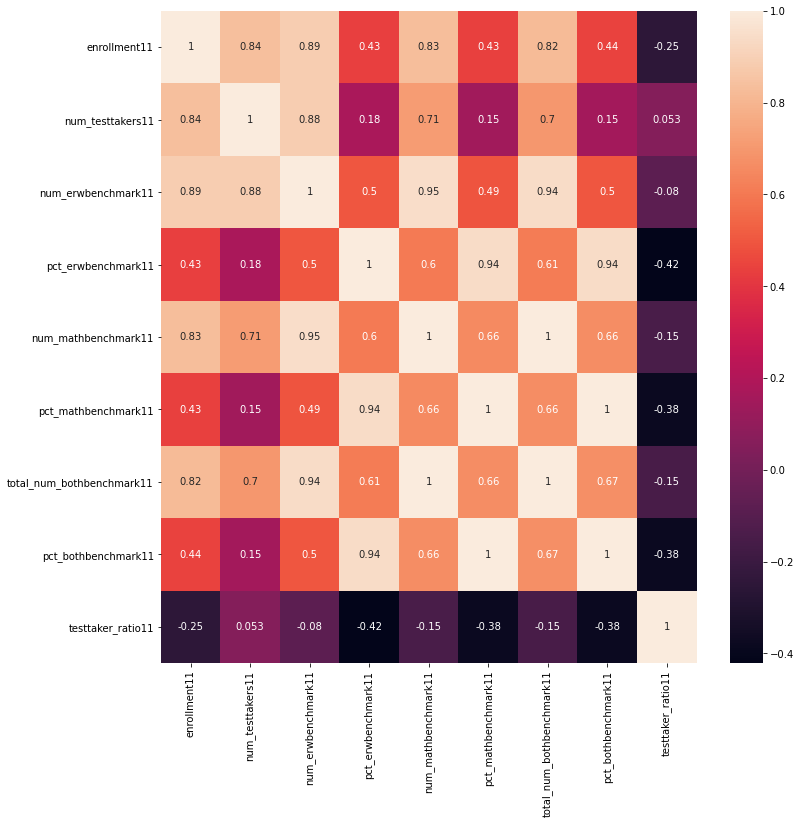

In [98]:
# Code
plt.figure(figsize = (12, 12))
g = sns.heatmap(sat_ca.corr(), annot = True);
plt.savefig('../images/california-correlation-data.png')

There is a high positive correlation between number of test takers and the number of students enrolled in the each school.

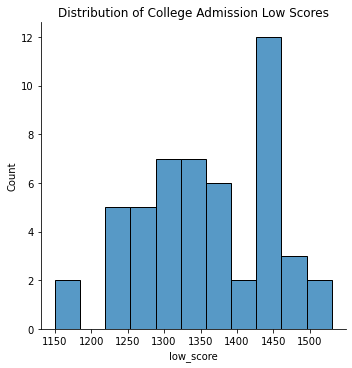

In [99]:
g = sns.displot(
    sat_by_college['low_score'],
    bins = 11,
).set(title = 'Distribution of College Admission Low Scores');
g.savefig('../images/college-low-scores.png')

It appears most of the colleges low score are distributed around the 1250 - 1400 range.

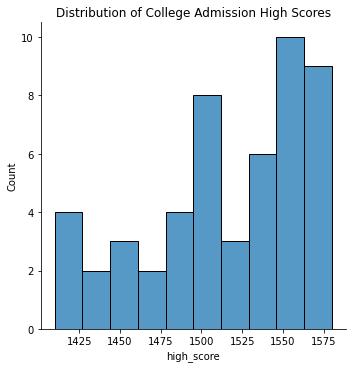

In [100]:
g = sns.displot(
    sat_by_college['high_score'],
    bins = 10
).set(title = 'Distribution of College Admission High Scores');
g.savefig('../images/college-high-scores.png')

It appears most of the colleges high scores are distributed around 1500+ range

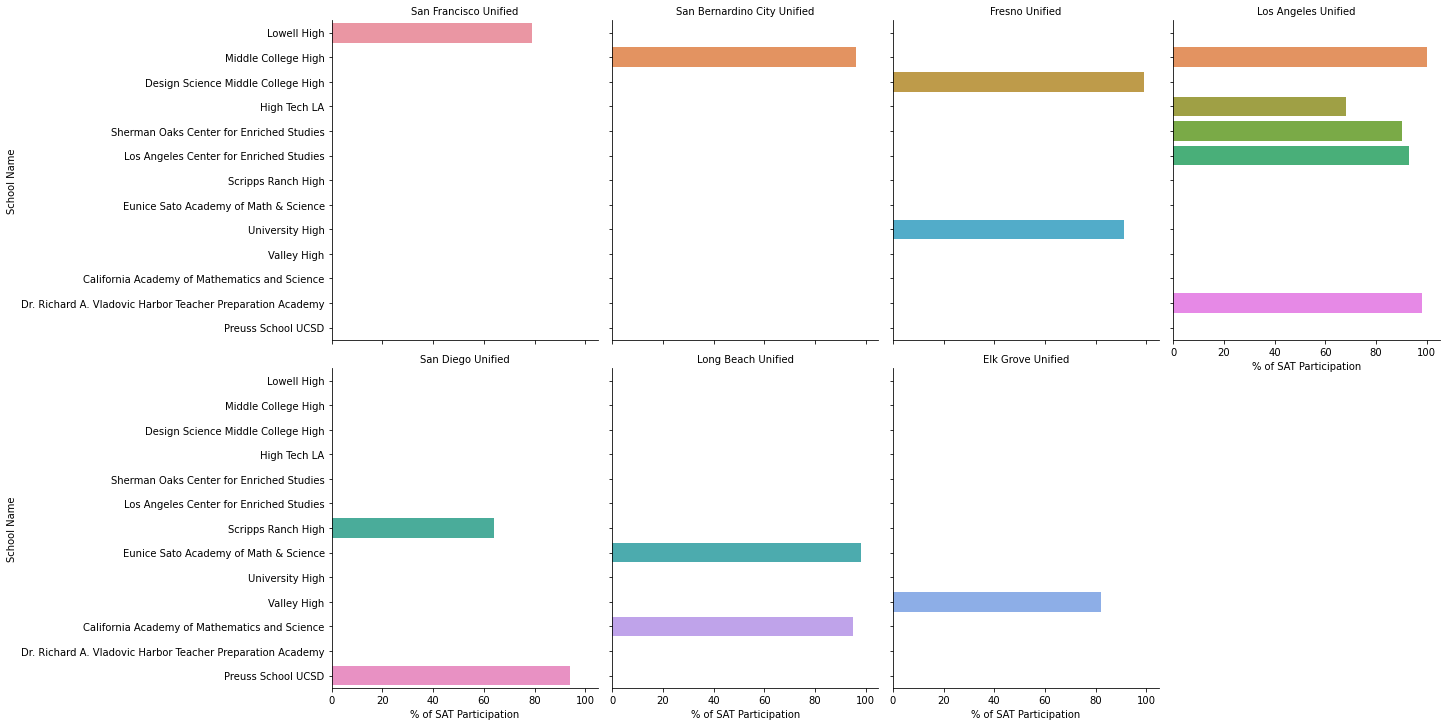

In [101]:
# Top schools in 60% participation group
list_of_schools = ['Valley High', 'University High', 'Design Science Middle College High', 'Dr. Richard A. Vladovic Harbor Teacher Preparation Academy',
                  'Los Angeles Center for Enriched Studies', 'High Tech LA', 'Sherman Oaks Center for Enriched Studies',
                  'Middle College High', 'Scripps Ranch High', 'Preuss School UCSD', 'Lowell High', 'Eunice Sato Academy of Math & Science',
                  'California Academy of Mathematics and Science']

g = sns.catplot(
    y = 'school_name',
    x = 'testtaker_ratio11', 
    data = sat_ca.loc[sat_ca['school_name'].isin(list_of_schools)],
    col = 'district_name',
    kind = 'bar',
    col_wrap = 4
)
g.set_titles("{col_name}")
g.set_xlabels('% of SAT Participation')
g.set_ylabels('School Name');
g.savefig('../images/upper7-districts.png')

Top Schools with 60% or more SAT participation and have 60% or more students who meet or excel the benchmark for both sections of the SAT

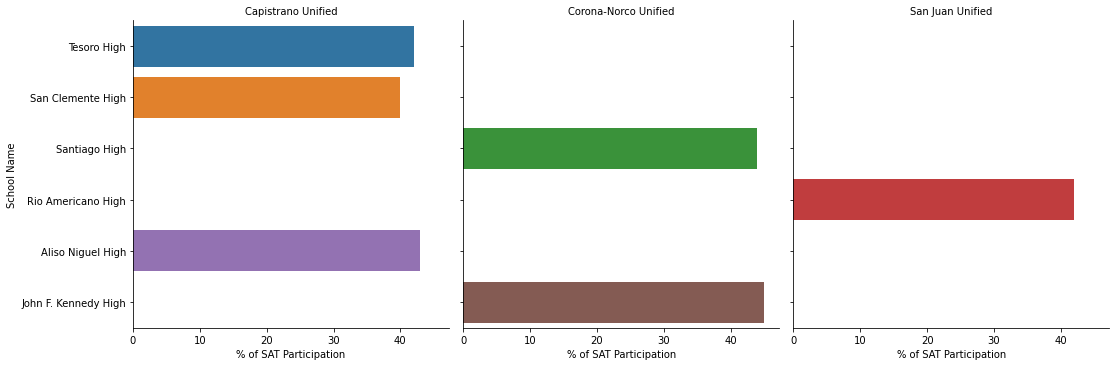

In [102]:
# Top schools in 60% participation group
list_of_schools = ['San Clemente High', 'Aliso Niguel High', 'Tesoro High', 'John F. Kennedy High', 'Santiago High', 'Rio Americano High' ]

g = sns.catplot(
    y = 'school_name',
    x = 'testtaker_ratio11', 
    data = sat_ca.loc[(sat_ca['school_name'].isin(list_of_schools)) & (sat_ca['district_name'] != 'Los Angeles Unified') ],
    col = 'district_name',
    kind = 'bar',
    col_wrap = 4
)
g.set_titles("{col_name}")
g.set_xlabels('% of SAT Participation')
g.set_ylabels('School Name');
g.savefig('../images/lower3-districts.png')

Remaining top schools with between 40% and 60% SAT participation and have 60% or more students who meet or excel the benchmark for both sections of the SAT

## Conclusions and Recommendations

The key take aways from my analysis are there are only 7 out of the 10 districts with schools who have more than 60% of their students take the SAT. The remaining districts have schools who have more than 40% of their students take the SAT. I recommend further investigation into Capistrano Unified district, Corona-Norco Unified district, San Juan Unified district as to see potentially why these districts have low SAT participation rates. Maybe these districts have more ACT participation rates. Out of the 10 largest districts I recommend investigating further into these top schools in each district:

* Elk Grove Unified
    * Valley High
* Fresno Unified
    * University High
    * Design Science Middle College High
* Los Angeles Unified
    * Dr. Richard A. Vladovic Harbor Teacher Preparation Academy
    * Los Angeles Center for Enriched Studies
    * High Tech LA
    * Sherman Oaks Center for Enriched Studies
* San Bernardino City Unified
    * Middle College High
* San Diego Unified
    * Scripps Ranch High
    * Preuss School UCSD
* San Francicsco Unified
    * Lowell High
* Long Beach Unified
    * Eunice Sato Academy of Math & Science
    * California Academy of Mathematics and Science
* Capistrano Unified
    * San Clemente High
    * Aliso Niguel High
    * Tesoro High
* Corona-Norco Unified
    * John F. Kennedy High
    * Santiago High
* San Juan Unified
    * Rio Americano High